In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DATA_DIR = os.path.join(
    ROOT,
    '..',
    'data2',
    'images_original_inception_resnet_v2_150x150_categorized_no_test')
MODEL_NAME_BASE = 'inception_ignoring_imbalance_1_whole_model_trainable'

Found 21024 files belonging to 8 classes.
Found 4307 files belonging to 8 classes.
Epoch 1/100
657/657 [==============================] - ETA: 0s - loss: 1.3145 - accuracy: 0.6060

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_1\assets


657/657 [==============================] - 231s 317ms/step - loss: 1.3145 - accuracy: 0.6060 - val_loss: 0.9991 - val_accuracy: 0.6861 - lr: 0.0010
Epoch 2/100
657/657 [==============================] - 150s 227ms/step - loss: 1.1094 - accuracy: 0.6098 - val_loss: 2.0755 - val_accuracy: 0.5382 - lr: 0.0010
Epoch 3/100
657/657 [==============================] - ETA: 0s - loss: 1.1231 - accuracy: 0.6004

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_3\assets


657/657 [==============================] - 208s 317ms/step - loss: 1.1231 - accuracy: 0.6004 - val_loss: 0.9825 - val_accuracy: 0.6534 - lr: 0.0010
Epoch 4/100
657/657 [==============================] - 153s 232ms/step - loss: 1.1031 - accuracy: 0.6047 - val_loss: 1.2285 - val_accuracy: 0.5907 - lr: 0.0010
Epoch 5/100
657/657 [==============================] - 153s 232ms/step - loss: 1.1258 - accuracy: 0.5986 - val_loss: 1.0304 - val_accuracy: 0.6466 - lr: 0.0010
Epoch 6/100
657/657 [==============================] - 152s 232ms/step - loss: 1.0721 - accuracy: 0.6130 - val_loss: 1.0270 - val_accuracy: 0.6417 - lr: 0.0010
Epoch 7/100
657/657 [==============================] - 152s 231ms/step - loss: 1.0575 - accuracy: 0.6172 - val_loss: 5.8113 - val_accuracy: 0.6417 - lr: 0.0010
Epoch 8/100
657/657 [==============================] - 152s 232ms/step - loss: 1.0463 - accuracy: 0.6272 - val_loss: 1.4190 - val_accuracy: 0.5644 - lr: 0.0010
Epoch 9/100
657/657 [==============================]

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_11\assets


657/657 [==============================] - 211s 320ms/step - loss: 1.0559 - accuracy: 0.6218 - val_loss: 0.9365 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 12/100
657/657 [==============================] - 157s 239ms/step - loss: 1.0584 - accuracy: 0.6216 - val_loss: 1.0381 - val_accuracy: 0.6673 - lr: 0.0010
Epoch 13/100
657/657 [==============================] - 159s 241ms/step - loss: 1.0035 - accuracy: 0.6420 - val_loss: 1.3521 - val_accuracy: 0.6120 - lr: 0.0010
Epoch 14/100
657/657 [==============================] - ETA: 0s - loss: 1.0252 - accuracy: 0.6378

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_14\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_14\assets


657/657 [==============================] - 217s 331ms/step - loss: 1.0252 - accuracy: 0.6378 - val_loss: 0.9025 - val_accuracy: 0.6701 - lr: 0.0010
Epoch 15/100
657/657 [==============================] - 160s 243ms/step - loss: 1.0816 - accuracy: 0.6200 - val_loss: 1.1235 - val_accuracy: 0.6476 - lr: 0.0010
Epoch 16/100
657/657 [==============================] - 161s 245ms/step - loss: 1.0577 - accuracy: 0.6209 - val_loss: 0.9307 - val_accuracy: 0.6636 - lr: 0.0010
Epoch 17/100
657/657 [==============================] - 160s 243ms/step - loss: 1.0358 - accuracy: 0.6284 - val_loss: 1.2490 - val_accuracy: 0.6631 - lr: 0.0010
Epoch 18/100
657/657 [==============================] - 160s 243ms/step - loss: 0.9859 - accuracy: 0.6480 - val_loss: 0.9827 - val_accuracy: 0.6729 - lr: 0.0010
Epoch 19/100
657/657 [==============================] - 160s 243ms/step - loss: 0.9658 - accuracy: 0.6496 - val_loss: 0.9212 - val_accuracy: 0.6619 - lr: 0.0010
Epoch 20/100
657/657 [=========================

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_24\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_24\assets


657/657 [==============================] - 219s 334ms/step - loss: 0.9413 - accuracy: 0.6528 - val_loss: 0.8418 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 25/100
657/657 [==============================] - 160s 243ms/step - loss: 0.9377 - accuracy: 0.6596 - val_loss: 2.4987 - val_accuracy: 0.6464 - lr: 0.0010
Epoch 26/100
657/657 [==============================] - 160s 244ms/step - loss: 0.9192 - accuracy: 0.6662 - val_loss: 1.2067 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 27/100
657/657 [==============================] - 160s 243ms/step - loss: 0.9297 - accuracy: 0.6605 - val_loss: 0.8732 - val_accuracy: 0.6958 - lr: 0.0010
Epoch 28/100
657/657 [==============================] - 159s 242ms/step - loss: 0.9321 - accuracy: 0.6613 - val_loss: 0.9926 - val_accuracy: 0.6578 - lr: 0.0010
Epoch 29/100
657/657 [==============================] - 160s 243ms/step - loss: 0.9368 - accuracy: 0.6598 - val_loss: 0.8581 - val_accuracy: 0.6849 - lr: 0.0010
Epoch 30/100
657/657 [=========================

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_31\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_31\assets


657/657 [==============================] - 220s 336ms/step - loss: 0.9048 - accuracy: 0.6699 - val_loss: 0.8407 - val_accuracy: 0.6912 - lr: 0.0010
Epoch 32/100
657/657 [==============================] - 165s 251ms/step - loss: 0.9436 - accuracy: 0.6573 - val_loss: 0.8613 - val_accuracy: 0.6898 - lr: 0.0010
Epoch 33/100
657/657 [==============================] - 165s 251ms/step - loss: 0.9000 - accuracy: 0.6695 - val_loss: 0.8548 - val_accuracy: 0.6919 - lr: 0.0010
Epoch 34/100
657/657 [==============================] - ETA: 0s - loss: 0.8759 - accuracy: 0.6789

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_34\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_34\assets


657/657 [==============================] - 224s 341ms/step - loss: 0.8759 - accuracy: 0.6789 - val_loss: 0.8183 - val_accuracy: 0.6982 - lr: 0.0010
Epoch 35/100
657/657 [==============================] - ETA: 0s - loss: 0.8579 - accuracy: 0.6853

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_35\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_35\assets


657/657 [==============================] - 227s 344ms/step - loss: 0.8579 - accuracy: 0.6853 - val_loss: 0.8182 - val_accuracy: 0.6972 - lr: 0.0010
Epoch 36/100
657/657 [==============================] - ETA: 0s - loss: 0.8528 - accuracy: 0.6865

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_36\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_36\assets


657/657 [==============================] - 230s 349ms/step - loss: 0.8528 - accuracy: 0.6865 - val_loss: 0.7998 - val_accuracy: 0.7095 - lr: 0.0010
Epoch 37/100
657/657 [==============================] - 172s 262ms/step - loss: 0.8389 - accuracy: 0.6932 - val_loss: 0.8562 - val_accuracy: 0.6863 - lr: 0.0010
Epoch 38/100
657/657 [==============================] - 171s 260ms/step - loss: 0.8290 - accuracy: 0.6925 - val_loss: 0.9290 - val_accuracy: 0.6619 - lr: 0.0010
Epoch 39/100
657/657 [==============================] - ETA: 0s - loss: 0.8448 - accuracy: 0.6910

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_39\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_39\assets


657/657 [==============================] - 233s 354ms/step - loss: 0.8448 - accuracy: 0.6910 - val_loss: 0.7835 - val_accuracy: 0.7230 - lr: 0.0010
Epoch 40/100
657/657 [==============================] - 171s 260ms/step - loss: 0.8506 - accuracy: 0.6883 - val_loss: 0.8086 - val_accuracy: 0.7153 - lr: 0.0010
Epoch 41/100
657/657 [==============================] - 169s 257ms/step - loss: 0.8217 - accuracy: 0.6961 - val_loss: 0.7990 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 42/100
657/657 [==============================] - 168s 256ms/step - loss: 0.8265 - accuracy: 0.6976 - val_loss: 0.7884 - val_accuracy: 0.7212 - lr: 0.0010
Epoch 43/100
657/657 [==============================] - ETA: 0s - loss: 0.8067 - accuracy: 0.7047

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_43\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_43\assets


657/657 [==============================] - 228s 347ms/step - loss: 0.8067 - accuracy: 0.7047 - val_loss: 0.7784 - val_accuracy: 0.7181 - lr: 0.0010
Epoch 44/100
657/657 [==============================] - 173s 263ms/step - loss: 0.8120 - accuracy: 0.7033 - val_loss: 0.8918 - val_accuracy: 0.7112 - lr: 0.0010
Epoch 45/100
657/657 [==============================] - ETA: 0s - loss: 0.7914 - accuracy: 0.7073

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_45\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_45\assets


657/657 [==============================] - 235s 358ms/step - loss: 0.7914 - accuracy: 0.7073 - val_loss: 0.7752 - val_accuracy: 0.7165 - lr: 0.0010
Epoch 46/100
657/657 [==============================] - 173s 263ms/step - loss: 0.7696 - accuracy: 0.7148 - val_loss: 0.8035 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 47/100
657/657 [==============================] - 173s 264ms/step - loss: 0.8191 - accuracy: 0.6973 - val_loss: 0.8701 - val_accuracy: 0.6910 - lr: 0.0010
Epoch 48/100
657/657 [==============================] - 173s 264ms/step - loss: 0.7891 - accuracy: 0.7089 - val_loss: 0.8365 - val_accuracy: 0.7012 - lr: 0.0010
Epoch 49/100
657/657 [==============================] - ETA: 0s - loss: 0.7814 - accuracy: 0.7120

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_49\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_49\assets


657/657 [==============================] - 232s 352ms/step - loss: 0.7814 - accuracy: 0.7120 - val_loss: 0.7696 - val_accuracy: 0.7225 - lr: 0.0010
Epoch 50/100
657/657 [==============================] - ETA: 0s - loss: 0.7481 - accuracy: 0.7222

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_50\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_50\assets


657/657 [==============================] - 230s 349ms/step - loss: 0.7481 - accuracy: 0.7222 - val_loss: 0.7624 - val_accuracy: 0.7281 - lr: 0.0010
Epoch 51/100
657/657 [==============================] - ETA: 0s - loss: 0.7391 - accuracy: 0.7262

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_51\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_51\assets


657/657 [==============================] - 235s 358ms/step - loss: 0.7391 - accuracy: 0.7262 - val_loss: 0.7386 - val_accuracy: 0.7311 - lr: 0.0010
Epoch 52/100
657/657 [==============================] - 178s 270ms/step - loss: 0.7331 - accuracy: 0.7304 - val_loss: 0.8008 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 53/100
657/657 [==============================] - 177s 269ms/step - loss: 0.7219 - accuracy: 0.7349 - val_loss: 0.7679 - val_accuracy: 0.7316 - lr: 0.0010
Epoch 54/100
657/657 [==============================] - 178s 270ms/step - loss: 0.7118 - accuracy: 0.7358 - val_loss: 0.8117 - val_accuracy: 0.7200 - lr: 0.0010
Epoch 55/100
657/657 [==============================] - ETA: 0s - loss: 0.7048 - accuracy: 0.7389

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_55\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_55\assets


657/657 [==============================] - 236s 359ms/step - loss: 0.7048 - accuracy: 0.7389 - val_loss: 0.7329 - val_accuracy: 0.7374 - lr: 0.0010
Epoch 56/100
657/657 [==============================] - ETA: 0s - loss: 0.6969 - accuracy: 0.7439

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_56\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_ignoring_imbalance_1_whole_model_trainable_3_56\assets


657/657 [==============================] - 240s 365ms/step - loss: 0.6969 - accuracy: 0.7439 - val_loss: 0.7140 - val_accuracy: 0.7479 - lr: 0.0010
Epoch 57/100
657/657 [==============================] - 174s 264ms/step - loss: 0.6843 - accuracy: 0.7472 - val_loss: 0.7642 - val_accuracy: 0.7293 - lr: 0.0010
Epoch 58/100
657/657 [==============================] - 174s 265ms/step - loss: 0.6949 - accuracy: 0.7383 - val_loss: 1.4679 - val_accuracy: 0.7288 - lr: 0.0010
Epoch 59/100
657/657 [==============================] - 174s 265ms/step - loss: 0.7384 - accuracy: 0.7246 - val_loss: 113.7381 - val_accuracy: 0.6482 - lr: 0.0010
Epoch 60/100
657/657 [==============================] - 175s 267ms/step - loss: 0.6977 - accuracy: 0.7405 - val_loss: 0.7534 - val_accuracy: 0.7379 - lr: 0.0010
Epoch 61/100
657/657 [==============================] - 176s 268ms/step - loss: 0.6645 - accuracy: 0.7525 - val_loss: 0.7314 - val_accuracy: 0.7441 - lr: 0.0010
Epoch 62/100
657/657 [=======================

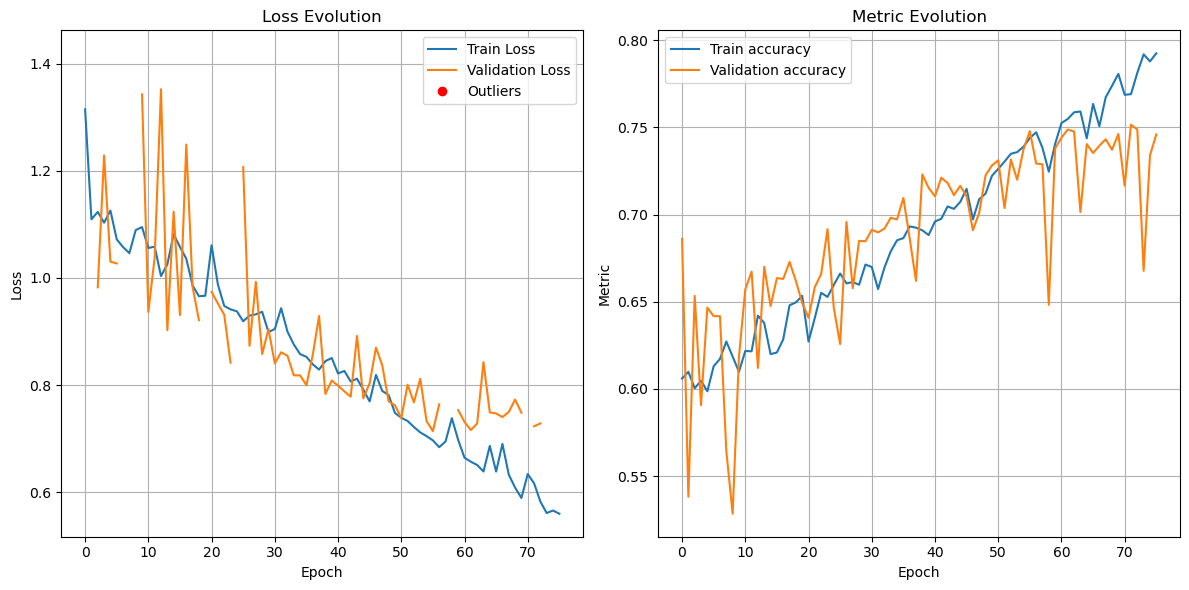

In [3]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    MODEL_NAME_BASE,
    lambda num_classes: lambda: get_basic_model(HEIGHT, WIDTH, num_classes),
    get_augmentation_layers)